# Vorbereitung

### Import

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
from tqdm.notebook import tqdm
from scipy.stats import zscore

In [3]:
data_authors = pd.read_csv("/content/drive/MyDrive/2024.Kanonizität/resources/data_authors.csv", index_col = [0])

In [4]:
indicators = [
    'SchulLeselisten',
    'UniLeselisten',
    'BDSL_Freitext_ab1985', 'BDSL_BehandeltePerson_ab1985',
    'BDSL_Freitext_ab2000', 'BDSL_BehandeltePerson_ab2000',
    'Wiki_pageviews',
    'Wiki_length',
    'Reclam_tokens', # 'Verlagsreihen_tokens',
    'Reclam_types', # 'Verlagsreihen_types',
    'Killy_length', # 'Lexika',
    'Abi',
    'UniLehrveranstaltungen',
    'Litgesch_Seiten'
    # 'Lovelybooks_Bewertungen',
    # 'Lovelybooks_Bibliotheken',
]

In [5]:
test_links = [
    'https://d-nb.info/gnd/118505602', # Bachmann
    'https://d-nb.info/gnd/118516906', # Büchner
    'https://d-nb.info/gnd/118519859', # Celan
    'https://d-nb.info/gnd/118523392', # Dahn
    'https://d-nb.info/gnd/118527908', # Dürrenmatt
    'https://d-nb.info/gnd/118536109', # Frisch
    'https://d-nb.info/gnd/118585916', # Musil
]

In [6]:
data_authors.loc[test_links][
    ['GND_Autor', 'UniLeselisten_Autor', 'SchulLeselisten_Autor',
    'GND_Gender', 'GND_Laender'] +
    [x+'_Summe' for x in indicators]
]

,GND_Autor,UniLeselisten_Autor,SchulLeselisten_Autor,GND_Gender,GND_Laender,SchulLeselisten_Summe,UniLeselisten_Summe,BDSL_Freitext_ab1985_Summe,BDSL_BehandeltePerson_ab1985_Summe,BDSL_Freitext_ab2000_Summe,BDSL_BehandeltePerson_ab2000_Summe,Wiki_pageviews_Summe,Wiki_length_Summe,Reclam_tokens_Summe,Reclam_types_Summe,Killy_length_Summe,Abi_Summe,UniLehrveranstaltungen_Summe,Litgesch_Seiten_Summe
GND,,,,,,,,,,,,,,,,,,,
https://d-nb.info/gnd/118505602,"Bachmann, Ingeborg","Bachmann, Ingeborg",Bachmann,female,Italien (XA-IT) + Österreich (XA-AT),0.063482,0.426219,2532.0,2218.0,1526.0,1351.0,990368.0,66902.0,0.0,0.0,2472.0,0.0,0.117337,0.002485
https://d-nb.info/gnd/118516906,"Büchner, Georg","Büchner, Georg",Büchner,male,Deutschland (XA-DE) + Frankreich (XA-FR) + Sch...,0.197066,0.649326,2083.0,1775.0,1133.0,981.0,900637.0,42336.0,17.0,11.0,3260.0,33.0,0.052440,0.005260
https://d-nb.info/gnd/118519859,"Celan, Paul","Celan, Paul",Celan,male,Frankreich (XA-FR) + Jüdischer Kulturkreis (Re...,0.015218,0.285438,3217.0,2951.0,2179.0,2039.0,553278.0,53030.0,0.0,0.0,2998.0,0.0,0.074729,0.001052
https://d-nb.info/gnd/118523392,"Dahn, Felix","Dahn, Felix",NaN,male,Deutschland (XA-DE),0.000000,0.001267,30.0,29.0,25.0,24.0,68339.0,29834.0,0.0,0.0,953.0,0.0,0.000000,0.000544
https://d-nb.info/gnd/118527908,"Dürrenmatt, Friedrich","Dürrenmatt, Friedrich",Dürrenmatt,male,Deutschland (XA-DE) + Schweiz (XA-CH),0.164674,0.310911,1123.0,1075.0,657.0,638.0,1225920.0,56558.0,0.0,0.0,4299.0,22.0,0.044193,0.001214
https://d-nb.info/gnd/118536109,"Frisch, Max","Frisch, Max",Frisch,male,Deutschland (XA-DE) + Italien (XA-IT) + Schwei...,0.118126,0.332953,1206.0,1098.0,672.0,617.0,902991.0,113706.0,0.0,0.0,3088.0,7.0,0.023975,0.002104
https://d-nb.info/gnd/118585916,"Musil, Robert","Musil, Robert",Musil,male,Deutschland (XA-DE) + Italien (XA-IT) + Schwei...,0.065484,0.367633,2949.0,2622.0,1653.0,1495.0,363942.0,67374.0,7.0,6.0,3571.0,3.0,0.115489,0.001885


### Filter

In [7]:
data_authors.shape[0]

11396

In [8]:
for indicator in indicators:
  author_count = data_authors[data_authors[indicator+'_Summe'] > 0].shape[0]
  print(f"{indicator:<30} : {author_count:<4} Personen")

SchulLeselisten                : 674  Personen
UniLeselisten                  : 912  Personen
BDSL_Freitext_ab1985           : 8565 Personen
BDSL_BehandeltePerson_ab1985   : 5298 Personen
BDSL_Freitext_ab2000           : 8243 Personen
BDSL_BehandeltePerson_ab2000   : 5021 Personen
Wiki_pageviews                 : 9179 Personen
Wiki_length                    : 9179 Personen
Reclam_tokens                  : 531  Personen
Reclam_types                   : 531  Personen
Killy_length                   : 7237 Personen
Abi                            : 77   Personen
UniLehrveranstaltungen         : 4395 Personen
Litgesch_Seiten                : 514  Personen


In [9]:
data_authors = (
    data_authors
    .query("GND_deutsch == True")
    .query("GND_Schriftsteller == True")
    .query("GND_Geburtsjahr.isna() or GND_Geburtsjahr >= 1400")
    .query("GND_Geburtsjahr.isna() or GND_Geburtsjahr <= 1980")
    .copy()
)

In [10]:
data_authors.shape[0]

5482

In [11]:
for indicator in indicators:
  author_count = data_authors[data_authors[indicator+'_Summe'] > 0].shape[0]
  print(f"{indicator:<30} : {author_count:<4} Personen")

SchulLeselisten                : 435  Personen
UniLeselisten                  : 715  Personen
BDSL_Freitext_ab1985           : 4491 Personen
BDSL_BehandeltePerson_ab1985   : 3911 Personen
BDSL_Freitext_ab2000           : 4216 Personen
BDSL_BehandeltePerson_ab2000   : 3707 Personen
Wiki_pageviews                 : 5053 Personen
Wiki_length                    : 5053 Personen
Reclam_tokens                  : 211  Personen
Reclam_types                   : 211  Personen
Killy_length                   : 4872 Personen
Abi                            : 72   Personen
UniLehrveranstaltungen         : 1325 Personen
Litgesch_Seiten                : 392  Personen


### Metrics

In [12]:
for indicator in indicators:
  data_authors[indicator+'_Anteil'] = data_authors[indicator+'_Summe']/data_authors[indicator+'_Summe'].sum()
  data_authors[indicator+'_Rang'] = data_authors[indicator+'_Summe'].rank(ascending=False)
  data_authors[indicator+'_zscore'] = zscore(data_authors[indicator+'_Summe'])

In [13]:
data_authors.loc[test_links][[
    'GND_Autor',
    'UniLeselisten_Summe', 'UniLeselisten_Anteil', 'UniLeselisten_Rang', 'UniLeselisten_zscore'
]]

,GND_Autor,UniLeselisten_Summe,UniLeselisten_Anteil,UniLeselisten_Rang,UniLeselisten_zscore
GND,,,,,
https://d-nb.info/gnd/118505602,"Bachmann, Ingeborg",0.426219,0.010729,17.0,7.503297
https://d-nb.info/gnd/118516906,"Büchner, Georg",0.649326,0.016345,8.0,11.498871
https://d-nb.info/gnd/118519859,"Celan, Paul",0.285438,0.007185,38.0,4.982072
https://d-nb.info/gnd/118523392,"Dahn, Felix",0.001267,0.000032,678.5,-0.107078
https://d-nb.info/gnd/118527908,"Dürrenmatt, Friedrich",0.310911,0.007827,37.0,5.438268
https://d-nb.info/gnd/118536109,"Frisch, Max",0.332953,0.008381,30.0,5.833009
https://d-nb.info/gnd/118585916,"Musil, Robert",0.367633,0.009254,25.0,6.454077


In [14]:
data_authors[[x+'_Anteil' for x in indicators]].sum()

,0
SchulLeselisten_Anteil,1.0
UniLeselisten_Anteil,1.0
BDSL_Freitext_ab1985_Anteil,1.0
BDSL_BehandeltePerson_ab1985_Anteil,1.0
BDSL_Freitext_ab2000_Anteil,1.0
BDSL_BehandeltePerson_ab2000_Anteil,1.0
Wiki_pageviews_Anteil,1.0
Wiki_length_Anteil,1.0
Reclam_tokens_Anteil,1.0
Reclam_types_Anteil,1.0


# Vergleich

In [15]:
data_authors.nsmallest(10, 'UniLeselisten_Rang')[
    ['GND_Autor'] + [x+'_Rang' for x in indicators]
]

,GND_Autor,SchulLeselisten_Rang,UniLeselisten_Rang,BDSL_Freitext_ab1985_Rang,BDSL_BehandeltePerson_ab1985_Rang,BDSL_Freitext_ab2000_Rang,BDSL_BehandeltePerson_ab2000_Rang,Wiki_pageviews_Rang,Wiki_length_Rang,Reclam_tokens_Rang,Reclam_types_Rang,Killy_length_Rang,Abi_Rang,UniLehrveranstaltungen_Rang,Litgesch_Seiten_Rang
GND,,,,,,,,,,,,,,,
https://d-nb.info/gnd/118540238,"Goethe, Johann Wolfgang von",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
https://d-nb.info/gnd/118607626,"Schiller, Friedrich",3.0,2.0,5.0,5.0,4.0,4.0,10.0,34.0,2.0,3.0,2.0,3.0,4.0,2.0
https://d-nb.info/gnd/118563076,"Kleist, Heinrich von",4.0,3.0,7.0,7.0,5.0,5.0,53.0,75.0,5.0,6.5,7.0,4.0,5.0,12.5
https://d-nb.info/gnd/118514768,"Brecht, Bertolt",8.0,4.0,4.0,4.0,7.0,7.0,7.0,19.0,2847.0,2847.0,3.0,7.0,12.0,5482.0
https://d-nb.info/gnd/118572121,"Lessing, Gotthold Ephraim",2.0,5.0,17.0,15.0,18.0,16.0,43.0,157.0,8.5,13.5,8.0,11.0,6.0,5.0
https://d-nb.info/gnd/118559230,"Kafka, Franz",9.0,6.0,3.0,2.0,3.0,2.0,2.0,13.0,15.5,13.5,21.0,2.0,2.0,27.0
https://d-nb.info/gnd/118577166,"Mann, Thomas",14.0,7.0,2.0,3.0,2.0,3.0,13.0,32.0,102.0,82.0,6.0,9.0,7.0,3.0
https://d-nb.info/gnd/118516906,"Büchner, Georg",12.0,8.0,26.0,30.0,34.0,34.0,57.0,258.0,14.0,17.5,53.0,5.5,51.0,15.0
https://d-nb.info/gnd/118552759,"Hofmannsthal, Hugo von",61.0,9.0,20.0,18.0,26.0,24.0,114.0,50.0,11.0,17.5,28.0,36.5,11.0,57.0


In [16]:
px.bar(
    data_authors.nlargest(10, 'UniLeselisten_zscore'),
    x = 'GND_Autor',
    y = [x+'_zscore' for x in indicators],
    barmode='group'
)

In [17]:
### Autor:innen
# nur Autor:innen, die in bestimmten Indikatoren vorkommen
prep_data = (
    data_authors
    .query("UniLeselisten_Summe > 0 and SchulLeselisten_Summe > 0 and Killy_length_Summe > 0")
    .query("Reclam_types_Summe > 0 and BDSL_Freitext_ab2000_Summe > 0 and Wiki_length_Summe > 0")
    .query("Abi_Summe > 0")
    .query("UniLehrveranstaltungen_Summe > 0")
).copy()

# alle Autor:innen
prep_data = data_authors.copy()

print(prep_data.shape[0])
prep_data = prep_data[[x+'_Summe' for x in indicators]]

### Methode
# cosine similarity
from sklearn.metrics.pairwise import pairwise_distances
plot_data = pairwise_distances(prep_data.T, metric='cosine')
plot_data = 1-plot_data
plot_data = pd.DataFrame(plot_data)
plot_data.index = prep_data.columns
plot_data.columns = prep_data.columns

# correlation
plot_data = prep_data.corr(method='pearson')

### Plot
fig = px.imshow(
    round(plot_data, 2),
    text_auto = True
)
fig.show()

5482


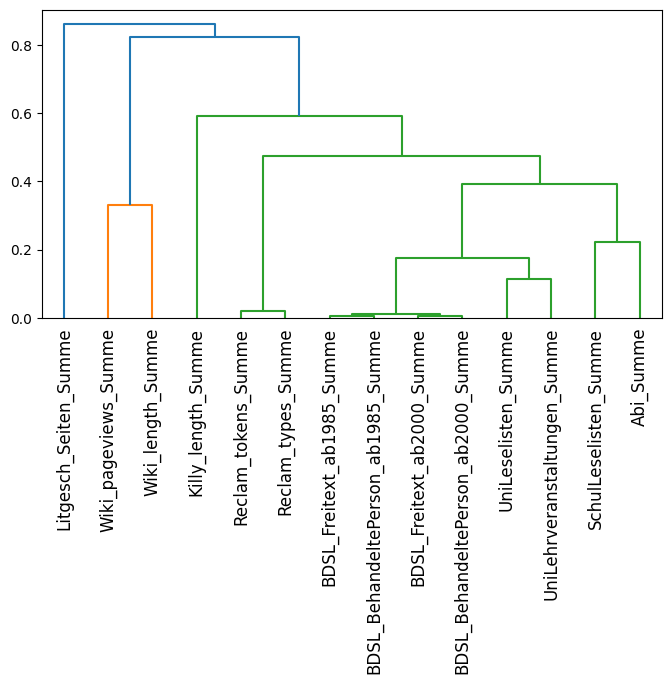

In [18]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Define the symmetrical distance matrix
distance_matrix = 1 - plot_data

# Convert to condensed distance matrix
condensed_dist_matrix = sch.distance.squareform(distance_matrix)

# Perform hierarchical clustering
linkage_matrix = sch.linkage(condensed_dist_matrix, method='ward')

# Plot the dendrogram
plt.figure(figsize=(8, 4))
sch.dendrogram(linkage_matrix, labels=plot_data.columns)
plt.xticks(rotation=90)
plt.show()


In [19]:
results = pd.DataFrame()
focus_indicator = 'Killy_length'
numbers_of_top_texts = range(0, 6000, 50)

for number_of_top_texts in tqdm(numbers_of_top_texts):
  for indicator in [x for x in indicators if x != focus_indicator]:
    # index_kanon = data_authors.nlargest(number_of_top_texts, 'Kanonizitaet_gesamt').index
    index_a = data_authors.nlargest(number_of_top_texts, focus_indicator+'_Summe').index
    # index_b = data_authors.nlargest(number_of_top_texts, indicator+'_Summe').index
    # index_intersect = index_a.intersection(index_b)
    # index_union = index_a.union(index_b)

    data_authors_index = data_authors.loc[index_a]
    correlation = data_authors_index[[focus_indicator+'_Summe', indicator+'_Summe']].corr(method='pearson').iloc[0,1]

    results.at[number_of_top_texts, indicator] = correlation

  0%|          | 0/120 [00:00<?, ?it/s]

In [20]:
px.line(
    results,
    labels={'value':f'Korrelation mit {focus_indicator}', 'index': f'Zahl der einbezogenen Autor:innen (geordnet nach {focus_indicator})'}
)

In [21]:
### Autor:innen
# nur Autor:innen, die in bestimmten Indikatoren vorkommen
prep_data = (
    data_authors
    .query("UniLeselisten_Summe > 0 and SchulLeselisten_Summe > 0 and Killy_length_Summe > 0")
    .query("Reclam_types_Summe > 0 and BDSL_Freitext_ab2000_Summe > 0 and Wiki_length_Summe > 0")
    .query("Abi_Summe > 0")
    .query("UniLehrveranstaltungen_Summe > 0")
).copy()
# prep_data = data_authors.nlargest(100, 'Kanonizitaet_gesamt')
prep_data[[x+'_zscore' for x in indicators]] = prep_data[[x+'_Summe' for x in indicators]].apply(zscore)

# alle Autor:innen
prep_data = data_authors.copy()

print(prep_data.shape[0])
prep_data = prep_data[[x+'_zscore' for x in indicators]]
prep_data = prep_data.T

### Methode
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
plot_data[['pca_x', 'pca_y']] = pca.fit_transform(prep_data)

### Plot
print(pca.explained_variance_ratio_)
fig = px.scatter(
    plot_data,
    x = 'pca_x',
    y = 'pca_y',
    text = [f"<b>{'_'.join(x.split('_')[:-1])}</b>" for x in plot_data.index],
)
fig.update_traces(marker=dict(size=30))
fig.update_traces(textfont=dict(size=16))
fig.show()

5482
[0.26691861 0.21467388]


In [22]:
diff_a = 'Wiki_pageviews_zscore' # rechts
diff_b = 'Reclam_tokens_zscore' # links

data_authors['diff'] = data_authors[diff_a] - data_authors[diff_b]
data_plot = pd.concat([data_authors.nlargest(10, 'diff'), data_authors.nsmallest(10, 'diff')])
data_plot = data_plot.sort_values(by = 'diff')

px.bar(
    data_plot,
    x = 'GND_Autor',
    y = 'diff',
    hover_data = [diff_a, diff_b, 'Reclam_tokens_Summe', 'Wiki_pageviews_Summe']
)

In [23]:
data_authors.groupby('GND_Gender')[[x+'_Anteil' for x in indicators]].sum()

,SchulLeselisten_Anteil,UniLeselisten_Anteil,BDSL_Freitext_ab1985_Anteil,BDSL_BehandeltePerson_ab1985_Anteil,BDSL_Freitext_ab2000_Anteil,BDSL_BehandeltePerson_ab2000_Anteil,Wiki_pageviews_Anteil,Wiki_length_Anteil,Reclam_tokens_Anteil,Reclam_types_Anteil,Killy_length_Anteil,Abi_Anteil,UniLehrveranstaltungen_Anteil,Litgesch_Seiten_Anteil
GND_Gender,,,,,,,,,,,,,,
Männlich,0.000000,0.000000,0.000000,0.000000,0.006912,0.004447,0.029795,0.018777,0.000000,0.000000,0.000000,0.000000,0.000000,0.008400
Unbekannt,0.000000,0.000000,0.000000,0.000000,0.000048,0.000030,0.000048,0.000180,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Weiblich,0.000000,0.000000,0.000000,0.000000,0.000973,0.001041,0.003680,0.003719,0.000000,0.000000,0.000000,0.000000,0.000000,0.001004
female,0.135845,0.122193,0.109185,0.111289,0.119668,0.123511,0.183736,0.156274,0.056295,0.063830,0.122838,0.051136,0.151118,0.093722
male,0.857397,0.876377,0.877985,0.878611,0.859232,0.860493,0.777565,0.800084,0.941658,0.933333,0.835541,0.948864,0.829668,0.895335
notKnown,0.006758,0.001430,0.012829,0.010100,0.013167,0.010478,0.005176,0.020966,0.002047,0.002837,0.041621,0.000000,0.019214,0.001539


# Gesamtscore(s)

In [34]:
# gesamt
categories_weights = {
    # Uni/Forschung
    'UniLeselisten' : 1/5,
    'UniLehrveranstaltungen' : 1/5,
    'BDSL_Freitext_ab2000' : 1/5,
    'Killy_length' : 1/5,
    'Litgesch_Seiten' : 1/5,

    # Schule
    'SchulLeselisten' : 0.5,
    'Abi' : 0.5,

    # Public
    'Wiki_pageviews' : 0.5,
    'Wiki_length' : 0.5,
    # 'Lovelybooks_Bewertungen' : 0,
    # 'Lovelybooks_Bibliotheken' : 0,

    # Verlag
    'Reclam_tokens' : 0.5,
    'Reclam_types' : 0.5,
}
categories = [x+'_zscore' for x in categories_weights.keys()]
weights = list(categories_weights.values())
data_authors['Kanonizitaet_gesamt'] = (data_authors[categories] * weights).sum(axis=1) / np.sum(weights)

In [35]:
# NichtLitWiss
categories_weights = {
    # Uni/Forschung
    'UniLeselisten' : 0,
    'UniLehrveranstaltungen' : 0,
    'BDSL_Freitext_ab2000' : 0,
    'Killy_length' : 0,
    'Litgesch_Seiten' : 0,

    # Schule
    'SchulLeselisten' : 0.5,
    'Abi' : 0.5,

    # Public
    'Wiki_pageviews' : 0.5,
    'Wiki_length' : 0.5,
    # 'Lovelybooks_Bewertungen' : 0,
    # 'Lovelybooks_Bibliotheken' : 0,

    # Verlag
    'Reclam_tokens' : 0.5,
    'Reclam_types' : 0.5,
}
categories = [x+'_zscore' for x in categories_weights.keys()]
weights = list(categories_weights.values())
data_authors['Kanonizitaet_NichtLitWiss'] = (data_authors[categories] * weights).sum(axis=1) / np.sum(weights)

In [36]:
# LitWiss
categories_weights = {
    # Uni/Forschung
    'UniLeselisten' : 1/5,
    'UniLehrveranstaltungen' : 1/5,
    'BDSL_Freitext_ab2000' : 1/5,
    'Killy_length' : 1/5,
    'Litgesch_Seiten' : 1/5,

    # Schule
    'SchulLeselisten' : 0,
    'Abi' : 0,

    # Public
    'Wiki_pageviews' : 0,
    'Wiki_length' : 0,
    # 'Lovelybooks_Bewertungen' : 0,
    # 'Lovelybooks_Bibliotheken' : 0,

    # Verlag
    'Reclam_tokens' : 0,
    'Reclam_types' : 0,
}
categories = [x+'_zscore' for x in categories_weights.keys()]
weights = list(categories_weights.values())
data_authors['Kanonizitaet_LitWiss'] = (data_authors[categories] * weights).sum(axis=1) / np.sum(weights)

In [37]:
fig = px.bar(
    data_authors.nlargest(20, 'Kanonizitaet_LitWiss'),
    x = 'GND_Autor',
    y = ['Kanonizitaet_gesamt', 'Kanonizitaet_NichtLitWiss', 'Kanonizitaet_LitWiss'],
    barmode = 'group',
    # color = 'GND_Gender',
)
# fig.update_xaxes(categoryorder="total descending")
fig.show()

In [38]:
fig = px.bar(
    data_authors.nlargest(100, 'Kanonizitaet_LitWiss'),
    x = 'GND_Autor',
    y = ['Kanonizitaet_LitWiss'],
    barmode = 'group',
    color = 'GND_Gender',
)
fig.update_xaxes(categoryorder="total descending")
fig.show()

In [39]:
test_authors = ['Rilke', 'Hofmannsthal', 'George, S']
test_authors = [x for x in data_authors['GND_Autor'] if any(y in x for y in test_authors)]

fig = px.bar(
    data_authors.query("GND_Autor.isin(@test_authors)"),
    x = 'GND_Autor',
    y = ['Kanonizitaet_gesamt', 'Kanonizitaet_NichtLitWiss', 'Kanonizitaet_LitWiss'],
    barmode = 'group'
)
fig.show()

In [40]:
fig = px.scatter(
    data_authors,
    x = 'Kanonizitaet_NichtLitWiss',
    y = 'Kanonizitaet_LitWiss',
    trendline = 'ols',
    hover_name = 'GND_Autor',
)
fig.show()

In [41]:
data_authors[['Kanonizitaet_gesamt', 'Kanonizitaet_NichtLitWiss', 'Kanonizitaet_LitWiss']].corr(method='pearson')

,Kanonizitaet_gesamt,Kanonizitaet_NichtLitWiss,Kanonizitaet_LitWiss
Kanonizitaet_gesamt,1.000000,0.990874,0.918721
Kanonizitaet_NichtLitWiss,0.990874,1.000000,0.857106
Kanonizitaet_LitWiss,0.918721,0.857106,1.000000


In [42]:
diff_a = 'Kanonizitaet_LitWiss' # rechts
diff_b = 'Kanonizitaet_NichtLitWiss' # links

data_authors['diff'] = data_authors[diff_a] - data_authors[diff_b]
data_plot = pd.concat([data_authors.nlargest(10, 'diff'), data_authors.nsmallest(10, 'diff')])
data_plot = data_plot.sort_values(by = 'diff')

px.bar(
    data_plot,
    x = 'GND_Autor',
    y = 'diff',
    hover_data = [diff_a, diff_b, 'Kanonizitaet_LitWiss', 'Kanonizitaet_NichtLitWiss']
)

In [43]:
data_authors.query("GND_Autor == 'May, Karl'")[[x+'_Rang' for x in indicators]].T

GND,https://d-nb.info/gnd/118818651
SchulLeselisten_Rang,2959.0
UniLeselisten_Rang,161.0
BDSL_Freitext_ab1985_Rang,16.0
BDSL_BehandeltePerson_ab1985_Rang,16.0
BDSL_Freitext_ab2000_Rang,15.0
BDSL_BehandeltePerson_ab2000_Rang,15.0
Wiki_pageviews_Rang,36.0
Wiki_length_Rang,40.0
Reclam_tokens_Rang,166.5
Reclam_types_Rang,155.0
